<a href="https://colab.research.google.com/github/SmirnygaTotoshka/FBB_Courses/blob/main/ML_Biology_Lec7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Бустинг

Идея градиентного бустинига, как и некоторых других методов, заключается в том, что мы обучаем не одну сильную модель, а много слабых. При этом каждая из из них, во время обучения, приближает нас к способности производить верное предсказание. Особенность же его в том, что после этапа и подсчета функции ошибки, градиентным спуском получает новое приблилжение, на котором обучается следующая модель. Таким образом, с каждой последующей моделью бустинг приближается к глобальному минимуму функции ошибки.


<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/Grad_Golf.png" alt="Drawing" width= "550px;"/>


<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/id_l/L7_00.jpg" alt="alttext" width=600/>

#Adaboost

Рассмотрим один первых вариант градиентного бустинга.

Допустим у нас есть набор плюсов и минусов, которые нужно классифицировать. Присвоим им одинаковый вес, потому что для этой модели вес элементов нужен.

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/Ada_boost_1.png" alt="Drawing" width= "550px;"/>


Первая модель отлично отделила все минусы и верно определила некоторые плюсы. Неверно определенным элементам прибавляем веса.

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/Ada_boost_2.png" alt="Drawing" width= "450px;"/>


Следующая модель обратила внимание на все плюсы, но неверно классифицировала несколько минусов. Теперь их очередь набирать вес.

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/Ada_boost_3.png" alt="Drawing" width= "450px;"/>


Новая модель отделила увесиситые минусы. 

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/Ada_boost_4.png" alt="Drawing" width= "450px;"/>


Теперь объединяем прдесказанные модели. В этой лекции мы не будем вдаваться в подробности того, как это делает Adaboost. 


Суммарно мы удачно классифицируем все представленные элементы.

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/Ada_boost_5.png" alt="Drawing" width= "650px;"/>


#Градиентный бустинг

Давайте немного поговорим про градиентный спуск. Грубо говоря, это способ пошагового поиска минимума функции. Для градиентного бустинга, нас интересует непосредственно функция ошибок. 

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/grad.jpeg" alt="Drawing" width= "650px;"/>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

In [ ]:
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [ ]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 3425.8713


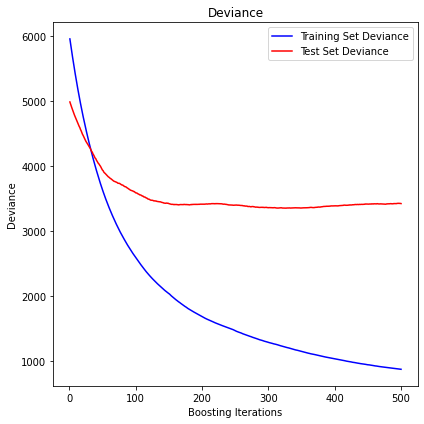

In [ ]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

На стадии оптимизации парметров имеет смысл оставить learning rate на последок. Остальными параметрами помимо шага, являются колличество деревьев и их глубину - это параметры напрямую характеризующие сложность деревьев. Мы хотим максимально простые, но еще способные на предсказания. Для этого подходят ограничение глубины дерева и минимальное число объектов в листе.

Важно помнить, что бустинги могут повышать качество предсказаний на тесте, даже если уже заучили весь трейн.

Посмотрим на Bias-Variance tradeoff на дереве, в случайном лесе и градиентом бустинге

In [ ]:
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    from matplotlib.colors import ListedColormap
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#f7e2eb','#6ab5a6','#e0eaf4'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#f7e2eb','#4c4c7f','#e0eaf4'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r*", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "^", c="#0795ff", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

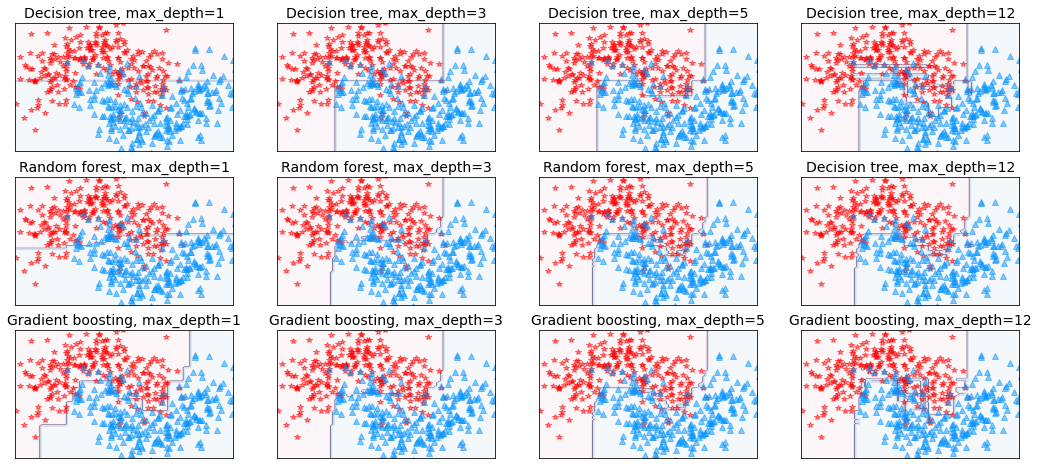

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X, y = sklearn.datasets.make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


plt.figure(figsize=(18,8))
plt.subplot(341)
dt1 = DecisionTreeClassifier(max_depth=1) 
dt1.fit(X_train, y_train)
plot_decision_boundary(dt1, X, y)
plt.xticks([], [])
plt.yticks([], [])

plt.title("Decision tree, max_depth=1", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(342)
dt3 = DecisionTreeClassifier(max_depth=3) 
dt3.fit(X_train, y_train)
plot_decision_boundary(dt3, X, y)
plt.title("Decision tree, max_depth=3", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])



plt.subplot(343)
dt5 = DecisionTreeClassifier(max_depth=5) 
dt5.fit(X_train, y_train)
plot_decision_boundary(dt5, X, y)
plt.title("Decision tree, max_depth=5", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(344)
dt12 = DecisionTreeClassifier(max_depth=12) 
dt12.fit(X_train, y_train)
plot_decision_boundary(dt12, X, y)
plt.title("Decision tree, max_depth=12", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(345)
rf1 = RandomForestClassifier(max_depth=1, n_estimators=500, n_jobs=-1) 
rf1.fit(X_train, y_train)
plot_decision_boundary(rf1, X, y)
plt.title("Random forest, max_depth=1", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(346)
rf3 = RandomForestClassifier(max_depth=3, n_estimators=500, n_jobs=-1) 
rf3.fit(X_train, y_train)
plot_decision_boundary(rf3, X, y)
plt.title("Random forest, max_depth=3", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(347)
rf5 = RandomForestClassifier(max_depth=5, n_estimators=500, n_jobs=-1) 
rf5.fit(X_train, y_train)
plot_decision_boundary(rf5, X, y)
plt.title("Random forest, max_depth=5", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(348)
rf12 = RandomForestClassifier(max_depth=5, n_estimators=500, n_jobs=-1) 
rf12.fit(X_train, y_train)
plot_decision_boundary(rf12, X, y)
plt.title("Decision tree, max_depth=12", fontsize=14)
plt.subplots_adjust()
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(349)
boost1 = GradientBoostingClassifier(max_depth=1, n_estimators=250)
boost1.fit(X_train, y_train)
plot_decision_boundary(boost1, X, y)
plt.title("Gradient boosting, max_depth=1", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(3, 4, 10)
boost3 =  GradientBoostingClassifier(max_depth=3, n_estimators=250) 
boost3.fit(X_train, y_train)
plot_decision_boundary(rf3, X, y)
plt.title("Gradient boosting, max_depth=3", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(3, 4, 11)
boost5 =  GradientBoostingClassifier(max_depth=5, n_estimators=250) 
boost5.fit(X_train, y_train)
plot_decision_boundary(rf5, X, y)
plt.title("Gradient boosting, max_depth=5", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(3, 4, 12)
boost12 =  GradientBoostingClassifier(max_depth=5, n_estimators=250) 
boost12.fit(X_train, y_train)
plot_decision_boundary(boost12, X, y)
plt.title("Gradient boosting, max_depth=12", fontsize=14)
plt.subplots_adjust()
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])
plt.show()

У градиентного бустинга имеется много примечательных модификаций срдеи которых - xgboost, lightgbm, catboost.

#Xgboost

**Xgboost** является модификацией градинтного бустинга. Работает быстрее, дополнительно штрафует деревья за большую глубину. 

Чтобы градиентный спуск происходил медленно, мы используем деревья глубины 2-3

In [ ]:
import xgboost

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
xg_reg = xgboost.XGBRegressor(learning_rate = 0.1, max_depth = 5, alpha = 10, min_child_weight=9, n_estimators = 10)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

[12:11:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.338297


#Lightgbm

**Lightgbm** - оптимизированная и более быстрая модификация градиентного бустинга. В отличие от xgboost не штрафует за глубину дерева, но ограничивает число листей в каждом дереве.

Так же, отличие Lightgbm что он бьет деревья по узлам, а не по уровням. Каждое разбиение должно понижать функцию ошибки.

In [ ]:
import lightgbm

In [ ]:
lgg_reg = lightgbm.LGBMRegressor(n_estimators=2000, learning_rate=0.1, max_depth=-1, num_leaves=100,                       
                     random_state=0, min_child_weight=7, n_jobs=-1) 

In [ ]:
lgg_reg.fit(X_train,y_train)

preds = lgg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.367369


#Catboost

In [ ]:
!pip install catboost

**Catboost** -  разрабатывался для улучшения точности в предсказании категориальных признаков. 

Имеет большое колличество эвристик для категориальных признаков разного вида и тд. Если у вас много категориальных признаков - catboost может очеень неплохо обогнать другие методы.

****

In [ ]:
import catboost

cat_reg = catboost.CatBoostRegressor(iterations=2000,  
                     learning_rate=0.1, 
                     depth=6,                       
                     random_state=777,
                     min_data_in_leaf=7,
                     verbose=0)

In [ ]:
cat_reg.fit(X_train,y_train)

preds = cat_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.327159


#Предсказание свойств лекарств при помощи градиентного бустинга

Задача предсказания свойств вещества и его потенциальной возможности иметь лекарственные свойства является важной задачей для современной области вычислительной химии и биологии. Нахождение дешевых и быстрых способов находить и проверять теоритически записи о конкртеных веществах - путь к серьзному ускорению и удешевлению процесса разработки лекарственных препаратов. Неудивительно, что работы в этом напрвалении идет сразу во многих подобластех, от квантовой химии до машинного обучения. 
 

Один из подходов к таким предсказаниям - это оценивать аффиность конкретного соединения к возможной мишени. С помощью модификаций градиентного бустинга это тоже можно проворачивать.

Simboost и SimboostQuant, которые работают в паре. Simboost  предсказывает аффинность между предполагаемой мешению и соединением, а SimboostQuant пытается предсказать точность полученной оценки. 

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/id_l/L7_01.png" alt="alttext" width=600/>

doi.org/10.1186/s13321-017-0209-z


Кроме этого, xgboost часто используется в качестве "надстройки", над признаками, полученными от нейросети. Так делают, в частности, в статье [DeepSEA](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4768299/). 



<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/paper0.png" alt="Drawing" width= "800px;"/>

Еще пара примеров.

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/paper1.png" alt="Drawing" width= "800px;"/>

https://pubmed.ncbi.nlm.nih.gov/30873528/

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/paper2.png" alt="Drawing" width= "800px;"/>

https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-018-2527-1


# Оценка важности признаков в дереве решений 

В биологии как правило нам важно не только качество предсказания, но и то, какие именно признаки использует модель. Это позволяет находить новые биологические закономерности и оценивать биологическую релевантность модели

Существует множество методов, позволяющих оценить важность признаков для модели. У каждого из этих методов есть свои минусы и плюсы, часть применимы только к деревьям, часть подходят для разных моделей


## Gini impurity


Эта мера считает, что важность признака для дерева определяется тем, насколько часто данный признак участвует в разбиениях и насколько хорошие разбиения позволяет производить. 

Также этот критерий учитывает то, что разбиения в начале дерева более важны, чем последующие.

Критерий может быть немного по-разному реализован, из-за этого разные библиотеки выдают разные значения Gini impurity важности для признаков. Обычно эти отличия не влияют на ранжирование признаков по важности. 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


cat_reg.feature_importances_

columns_dia = ["age", "sex", "bmi", "bp", "s1 tc", "s2 ldl", "s3 hdl", "s4 tch", "s5 ltg", "s6 glu"]

In [ ]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

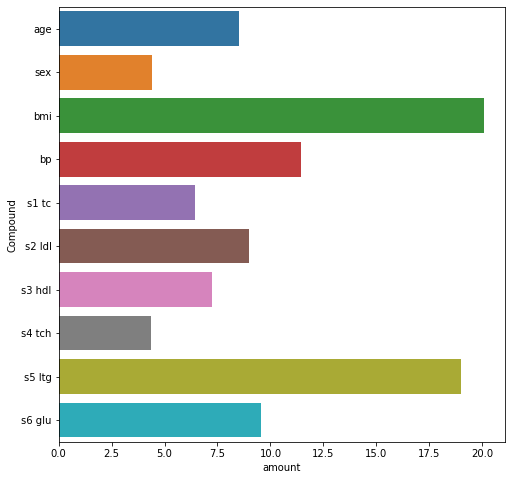

In [ ]:
df = pd.DataFrame({"Compound": columns_dia, "amount": cat_reg.feature_importances_})

plt.figure(figsize=(8,8))
sns.barplot(data=df, y="Compound", x="amount", orient = 'h')


## Перестановочный метод.

Можно оценить знначимость признака перемешав его значения. Если признак важный, то точность предсказания при таком перемешивании начинает падать. В зависимости от того на сколько точность падает в сравнении с исходным качеством, становится ясна важность признака.


Минусом такого подхода является ошибка при работе с кореллированными признаками - их значимость будет завышена.

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
r = permutation_importance(cat_reg, X_test, y_test,
                            n_repeats=100,
                            random_state=0)

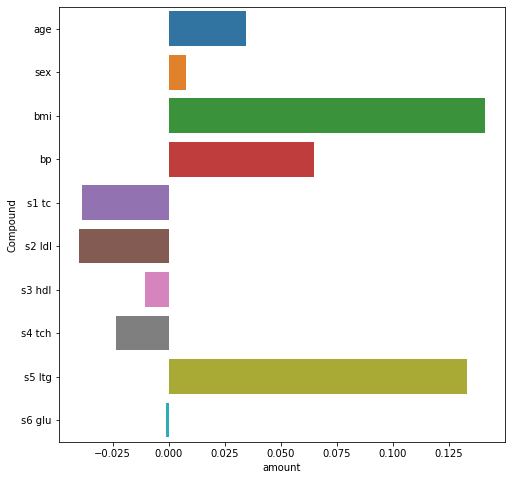

In [ ]:
df = pd.DataFrame({"Compound": columns_dia, "amount": r.importances_mean})

plt.figure(figsize=(8,8))
sns.barplot(data=df, y="Compound", x="amount",orient = 'h')

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
r = permutation_importance(cat_reg, X_test, y_test,
                            n_repeats=100,
                            random_state=0)

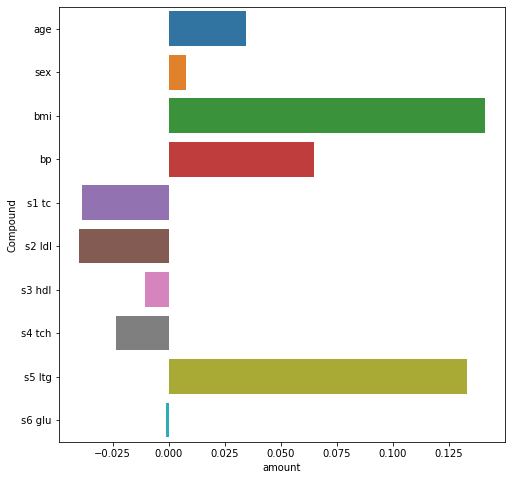

In [ ]:
df = pd.DataFrame({"Compound": columns_dia, "amount": r.importances_mean})

plt.figure(figsize=(8,8))
sns.barplot(data=df, y="Compound", x="amount",orient = 'h')

#Boruta

Boruta - метод, который позволяет выбрать признаки, которые модель **значимо** считает важными. Они не возвращает важностей признаков напрямую (только нестрого ранжирует отобранные), но зато избавляет нас от необходимости выбирать порог, на котором мы считаем признаки значимыми. 


Создадим на основе нашего датасета датасет с теневыми признаками. 
Теневой признак - это исходный признак, который перемешан вдоль строк.  За счет этого его распределение сохраняется, а вот связь с предсказываемой переменной теряется. 


<img src="https://kodomo.fbb.msu.ru/FBB/year_20/boruta1.png" alt="alttext" width=600/>

Далее добавим колонки из теневого датасета в датасет с исходными признакми.



После этого обучимся на таком датасете предсказывать целевую переменную и возьмем полученные каким-то способом важности признаков. 

Считаем хорошими только те признаки, которые по важности лучше теневых. 

Однако на этом нельзя остановиться: перемешивание - случайный процесс, и потому некоторые признаки могут проиграть теневым по случайным причинам. 

Потому повторяем процедуру много раз. Для каждого признака мы будем знать сколько раз мы посчитали его хорошим. 

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/boruta_bell.png" alt="alttext" width=600/>

Те признаки, которые считались хорошими очень часто - можно взять. Те признаки, которые проигрывали теневым очень часто - можно выкинуть. 
Останутся пограничные признаки, которые незначимо отличаются от теневых, и непонятно, в какую сторону. Обычно их тоже выкидывают

In [ ]:
!pip install boruta

     |████████████████████████████████| 56 kB 2.5 MB/s 


In [ ]:
from sklearn import preprocessing
from boruta import BorutaPy

In [ ]:
fetch = BorutaPy(reg, n_estimators='auto', verbose=2, random_state=1)
fetch.fit(X_train, y_train)
fetch.support_
fetch.ranking_
X_filtered = fetch.transform(X_train)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	0
Rejected: 	0


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	0
Rejected: 	0


In [ ]:
ranks = list(zip(diabetes.feature_names, fetch.ranking_, fetch.support_))
#X_check, y_check = diabetes.data, diabetes.target

X_check = []
8_05
for n, feat in enumerate(ranks):
    print('Feature: {:<25} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))

Feature: age                       Rank: 1,  Keep: True
Feature: sex                       Rank: 1,  Keep: True


# Explainability 

Часто нам нужно не просто отобрать значимые признаки, но мы еще хотим понять, почему модель приняла то или иное решение по поводу данного объекта. 



## Детекция неправильного построения датасета

### Хаски
Один из известных примеров - нейросеть, обученная отличать волков от собак породы хаски, научилась отличать их на основе снега на заднем фоне.

Просто волки встречаются на снегу очень часто, а хаски - редко. 





<img src="https://kodomo.fbb.msu.ru/FBB/year_20/husky_wolf.png" alt="alttext" width=600/>



### Лошади

Другим известным [примером](https://www.nature.com/articles/s41467-019-08987-4) является история про то, как модели определяли фотографии лошадей на основании подписей на картинках. 

Фотографии в датасете были собраны из интернета и с них не были удалены подписи заводчиков. 



В результе если подпись на картинке с лошадью есть, то модель распознает лошадь. Иначе - нет. 
<img src="https://kodomo.fbb.msu.ru/FBB/year_20/cleverhans_horse.png" alt="alttext" width=600/>



Более того, если перенести подпись заводчика на картинку с машиной, то она будет классифицирована как картинка с лошадью

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/cleverhans_car.png" alt="alttext" width=600/>

## Медицинские изображения 




На медицинских изображениях [тоже](https://journals.plos.org/plosmedicine/article?id=10.1371/journal.pmed.1002683) могут быть специфические метки, например, от врачей или прибора. 

И нейросеть может научиться детектировать именно это. 

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/chest_radiograph_explain.png" alt="alttext" width='300px'/>


#SHAP

Одним из методов, позволяющих объяснять предсказания модели является SHAP. 


<img src="https://miro.medium.com/max/1120/1*GOwxZ1ApAidTIDoa2l98ew.png" alt="alttext" width='300px'/>

Пусть у нас есть некая модель, которая предсказывает з/п на основании пола, возраста и работы. 





Самое простое "предсказание", не учитывающее никакие другие признаки -  это средняя зарплата 

Далее мы можем сделать предсказание при помощи моделей, берущих в рассмотрение ровно один признак. 
Затем - два.
И, наконец, модель, использующую все признаки. 



Как оценить вклад признака Age? 



<img src="https://miro.medium.com/max/1120/1*7keBLSQszepu5jITz8SKxA.png" alt="alttext" width='400px'/>

Стрелки на картинке обозначают переходы от моделей без признака Age к моделям с этим признакам. Изменение предсказанного значения между моделью без Age и с ним, происходит именно за счет признака Age. 

Тогда мы можем считать, что 


<img src="https://miro.medium.com/max/1120/1*QpRB2gX5uJVU2cWRkrNvsA.png" alt="alttext" width='700px'/>


Осталось только понять, как взвесить ребра. Сделаем так, чтобы на каждом "уровне" сумма ребер была равна 1. И поделим веса между ребрами поровну

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/marginal_weights_shap.png" alt="alttext" width='400px'/>

In [ ]:
!pip install shap

import shap

     |████████████████████████████████| 371 kB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509240 sha256=1433906be3d60ff5a083d083a8bdc2f3a98cd9f437a8f72ef926e29afed0147e
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


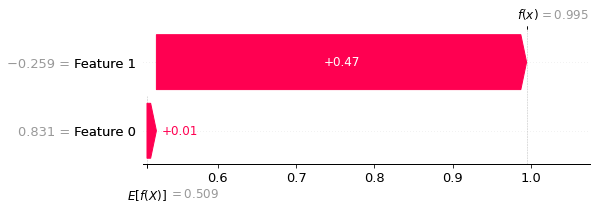

In [ ]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(cat_reg)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

#Анализ функциональных групп лиганда, важных для заданного фермента при помощи SHAP

Помимо уже упомянутого SimBoost, машинное обучение может решать обратную задачу. Допустим у нас уже есть большая библиотека известных терапевтических соединений (а она у нас есть) для которых точно известно, что они связываются с конкретным ферментом, что если мы обучим по этой базе модель, и попытаемся оценить, какие признаки для этой модели важн, а какие нет. Если выяснять действительно важные регигионы автоматически - это открывате огромный потенциал к более быстрой, а главное более осозноной разработке новых препаратов.

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/id_l/L7_02.png" alt="alttext" width=600/>

Датасет состовлялся из базы даннх ChEMBL. Сами молекулы векторизировались, дальше обучалось маодели и при помощи SHAP анализировалось значемость тех или инфх признаков исследуемого вещества.
